In [1]:
from PIL import Image
import numpy as np

In [2]:
def resize_grayscale_image(image, target_size=(200, 200), crop_bottom=False):
    """
    Redimensionne une image en gardant les proportions. Le recadrage peut se faire au centre de l'image ou en bas.
    :param image: Image à redimensionner (height, width)
    :param target_size: Taille de l'image redimensionnée
    :param crop_bottom: Position du recadrage en bas de l'image (par défaut le recadrage est centré)
    """
    target_height, target_width = target_size
    image_height, image_width = image.shape

    # Calcul l'offset horizontal (entre le bord gauche de l'image et le bord gauche du crop) pour centrer l'image
    if target_width > image_width:
        left_crop = 0
        target_width = image_width
        print(f"Warning: target width is larger than image width ({target_size[1]} > {image_width}). Width will not be cropped.")
    else:
        left_crop = (image_width - target_width) // 2

    # Calcul l'offset vertical (entre le bord haut de l'image et le bord haut du crop) en fonction de la position du crop ("center ou lower")
    if target_height > image_height:
        top_crop = 0
        target_height = image_height
        print(f"Warning: target height is larger than image height ({target_size[0]} > {image_height}). Height will not be cropped.")
    else:
        top_crop = image_height - target_height
        if crop_bottom == False:
            top_crop = top_crop // 2

    # Crop l'image
    image = image[top_crop:top_crop + target_height, left_crop:left_crop + target_width]
    return np.expand_dims(image, axis=0)

In [3]:
image = Image.open("img1.png").convert("L")
image = np.array(image)

In [4]:
resized_image = resize_grayscale_image(image, target_size=(200, 200), crop_bottom=True)
resized_image.shape

(1, 200, 200)

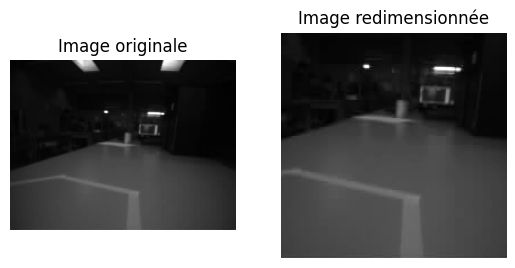

In [5]:
import matplotlib.pyplot as plt

# Affichage de l'image originale
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Image originale")
plt.axis("off")

# Affichage de l'image redimensionnée
plt.subplot(1, 2, 2)
plt.imshow(np.squeeze(resized_image, axis=0), cmap="gray")
plt.title("Image redimensionnée")
plt.axis("off")

plt.show()